# Task 2-I : Decision Tree I

# Pima indian diabetes analysis

**Note**
* [You can find this data & Information in kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1)
* class info :
    * 1 : tested positive for diabetes
    * 0 : tested negative for diabetes

In [ ]:
###################
## Run this cell ##
###################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/pima_diabetes.csv'
db = pd.read_csv(data_path)
db.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Q2. Split the db into training set & validation set & test set

1. x : all columns in db except 'Outcome'
2. y : the column 'Outcome' in db
3. variable names :
    * x_train, y_train
    * x_valid, y_valid
    * x_test, y_test
4. split data into training set and test set first
5. split training set into training set and validation set
6. train : valid : test = 7 : 2 : 1
5. randomstate : 2021
6. shuffle : True

In [ ]:
####################
## your code here ##
####################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(db.drop(['Outcome'], axis=1), db['Outcome'],
                                                    test_size = 0.1 , random_state = 2021,shuffle=True)


x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                                                    test_size = 2/9 , random_state = 2021,shuffle=True)
                            

# same professor's code


In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
258,1,193,50,16,375,25.9,0.655,24
220,0,177,60,29,478,34.6,1.072,21
438,1,97,70,15,0,18.2,0.147,21
130,4,173,70,14,168,29.7,0.361,33
730,3,130,78,23,79,28.4,0.323,34
...,...,...,...,...,...,...,...,...
243,6,119,50,22,176,27.1,1.318,33
715,7,187,50,33,392,33.9,0.826,34
32,3,88,58,11,54,24.8,0.267,22
702,1,168,88,29,0,35.0,0.905,52


# Q3. Train 30 decision trees by increasing min_samples_leaf from 1 to 30 one by one

1. Put the trained trees into a list named 'trees'
    * Tree with smallest min_samples_leaf should be the first element of trees list
    * Tree with largest min_samples_leaf should be the last element of trees list

In [ ]:
####################
## your code here ##
####################
from sklearn.tree import DecisionTreeClassifier

trees = []

for i in range(1,31):
    dtc = DecisionTreeClassifier(min_samples_leaf= i)
    dtc.fit(x_train,y_train)
    trees.append(dtc)


# same professor's code


# Q4. Evaluate all decision trees on the validation set
* Use accuracy ( unit should be % )
* Put the every accuracy into a list named accs_val
* Print every result.
    * Example
```
min_samples_leaf 1 : 30.01%
min_samples_leaf 2 : 35.45%
...
min_samples_leaf 30 : 61.85%
```

In [ ]:
####################
## your code here ##
####################
from sklearn.metrics import accuracy_score
accs_val = []
for i in range(30):
    dtc = trees[i]
    y_pred_valid = dtc.predict(x_valid)
    valid_accuracy = accuracy_score(y_valid, y_pred_valid)
    accs_val.append(valid_accuracy)
    print(f"min_samples_leaf {i+1} : {valid_accuracy*100:.2f}%")


# professor's code 
# from sklearn.metrics import accuracy_score as ACC

# accs_val = []

# for n in range(1, 31):
#     i = n -1
#     dtc = trees[i]
#     y_pred = dtc.predict(x_valid)
#     acc = ACC(y_valid, y_pred)
#     accs_val.append(acc)

#     print(f"min_samples_leaf {n} : {acc*100:.2f}%")



min_samples_leaf 1 : 64.29%
min_samples_leaf 2 : 66.88%
min_samples_leaf 3 : 68.18%
min_samples_leaf 4 : 68.83%
min_samples_leaf 5 : 71.43%
min_samples_leaf 6 : 72.73%
min_samples_leaf 7 : 74.68%
min_samples_leaf 8 : 74.68%
min_samples_leaf 9 : 77.27%
min_samples_leaf 10 : 76.62%
min_samples_leaf 11 : 76.62%
min_samples_leaf 12 : 75.32%
min_samples_leaf 13 : 76.62%
min_samples_leaf 14 : 77.27%
min_samples_leaf 15 : 78.57%
min_samples_leaf 16 : 78.57%
min_samples_leaf 17 : 78.57%
min_samples_leaf 18 : 78.57%
min_samples_leaf 19 : 78.57%
min_samples_leaf 20 : 79.22%
min_samples_leaf 21 : 79.22%
min_samples_leaf 22 : 77.27%
min_samples_leaf 23 : 77.92%
min_samples_leaf 24 : 77.92%
min_samples_leaf 25 : 77.27%
min_samples_leaf 26 : 77.27%
min_samples_leaf 27 : 74.03%
min_samples_leaf 28 : 74.03%
min_samples_leaf 29 : 74.03%
min_samples_leaf 30 : 74.03%


# Q5. Visualize the result of Q4

* Use line plot
    - x-axis : 1 ~ 30 ( min_samples_leaf which you used)
    - y-axis : accuracy 
& You can import more libraries you want

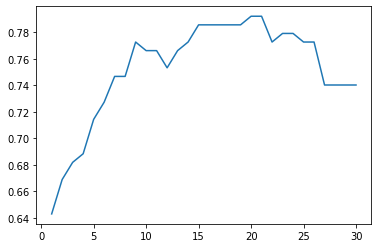

In [ ]:
####################
## your code here ##
####################
import matplotlib.pyplot as plt

x = []
for i in range(1,31): x.append(i)
plt.plot(x,accs_val)
plt.show()

# professor's code

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,5))
# plt.plot(range(1,31), accs_val)
# plt.show()


# Q6. Choos the model with the best performance on the validation set.

* Take the best tree out of the list(trees) and declare a variable with it
* The name of variable is best_tree
* Choose the best tree based on the results of Q4~Q5
* Choose the one with the highest min_samples_leaf, if there are multiple trees with the same top accuracy


In [ ]:
####################
## your code here ##
####################

from sklearn.tree import DecisionTreeClassifier

best_tree = trees[20] #정확도가 제일 높은 모델이기 때문에 이 모델이 best tree 이다.

dtc_best = best_tree

dtc_best.fit(x_train,y_train)


DecisionTreeClassifier(min_samples_leaf=21)

# Q7. Quiz using classification report

* Show the classification report of best_tree on test set
* Answer the questions based on classification report
    * Q1 : What does recall for 'positive' class mean?
    * Q2 : What does recall for 'negative' class mean?

In [ ]:
#######################################
## Run this cell & Write your answer ##
#######################################

from sklearn.metrics import classification_report

y_pred_test = dtc_best.predict(x_test)

target_names = ['negative', 'positive']

print(classification_report(y_test, y_pred_test, target_names=target_names))



              precision    recall  f1-score   support

    negative       0.74      0.87      0.80        45
    positive       0.75      0.56      0.64        32

    accuracy                           0.74        77
   macro avg       0.74      0.71      0.72        77
weighted avg       0.74      0.74      0.73        77



# recall => [of correct prediction]/[of the real this value]
# precision -> [of correct prediction]/[of prection this value]


R1) 실제 당뇨 환자 중에 실제로 당뇨 환자로 예측될 확률이 recall posive 라고 한다. 즉 recall of postive가 0.56이므로 실제로 당뇨 환자 중에 실제 당뇨 환자로 예측될 확률이 56퍼, 반대로 실제로 당뇨 환자 지만 당뇨 환자로 예측되지 않을 확률이 44퍼 이다.


<professor's anser> 56% of actual positive is predicted to be positive


R2) 실제로 당뇨 환자가 아닌 사람 중에 당뇨 환자가 아니라고 진단 받을 확률을 recall negative 라고 한다. 즉 recall of negative 가 0.87이므로 병원에서 실제로 당뇨 환자가 아닌데 당뇨환자가 아니라고 진단 받을 확률이 87퍼, 반대로 실제로 당뇨 환자가 아닌데 당뇨 환자라고 진단 받을 확률이 23퍼이다.
<professor's code> 87% of actual positive is predicted to be negative



# Q8. Visualize the feature importances using best_tree

* Use horizontal bar plot
    - x : names of features
    - height : feature importances
    - You can also try (vertical) bar plot
* You can import more libraries you want.

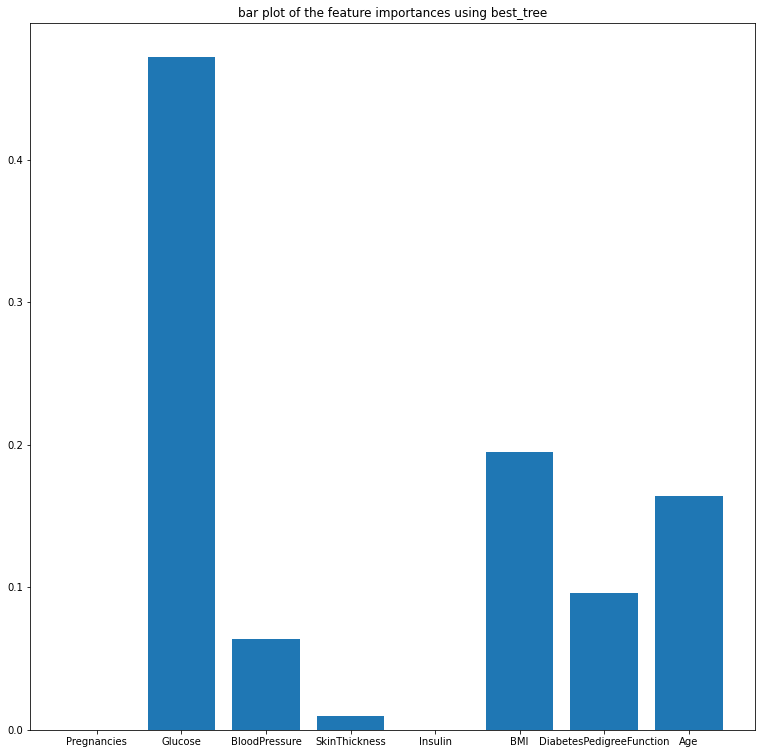

In [ ]:
####################
## Your code here ##
####################


plt.figure (figsize=(13,13))
plt.title('bar plot of the feature importances using best_tree')
x = db.drop("Outcome", axis = 1).columns
y = best_tree.feature_importances_

plt.bar(x, y)
plt.show()

# professor's code

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,5))
# plt.bar(x = x_train.columns, height = best_tree.feature_importances_)
# plt.show()





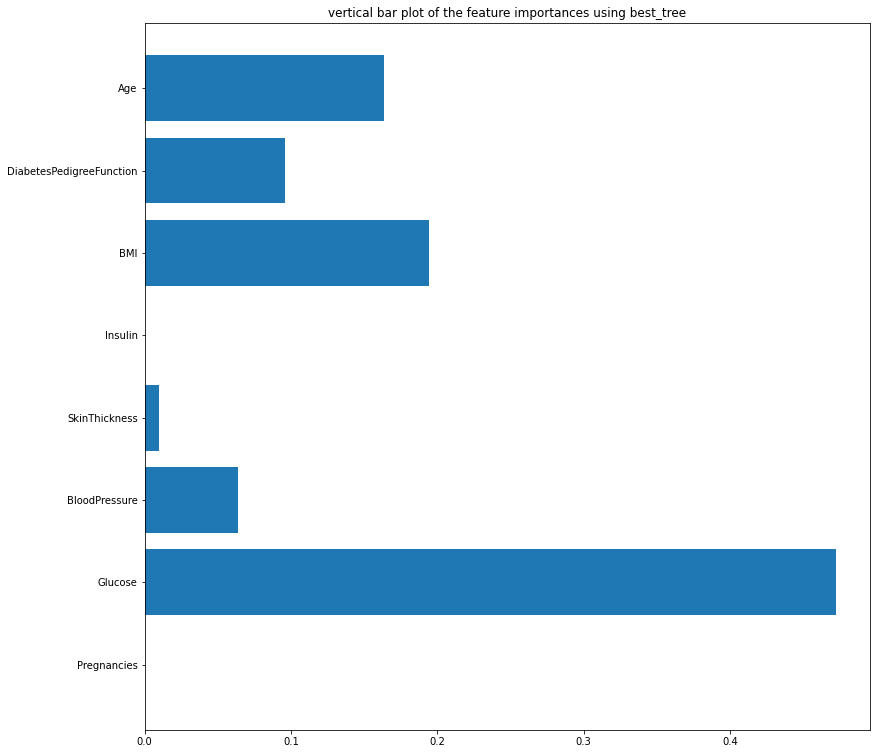

In [ ]:
#########################
## (vertical) bar plot ##
#########################

plt.figure (figsize=(13,13))
plt.title('vertical bar plot of the feature importances using best_tree')
plt.barh(x,y)
plt.show()

#professor's code

# import matplotlib.pyplot as plt

# plt.figure(figsize=(5,5))
# plt.barh(y = x_train.columns, width = best_tree.feature_importances_)
# plt.show()


# Q9. Visualize the best_tree

1. Visualize the tree
    * fontsize : 15
    * filled : True
    * feature names & class names must be specified
2. Interpret the results
    * Use the three most important rules.
    * Interpretation using proportions of classes should be included

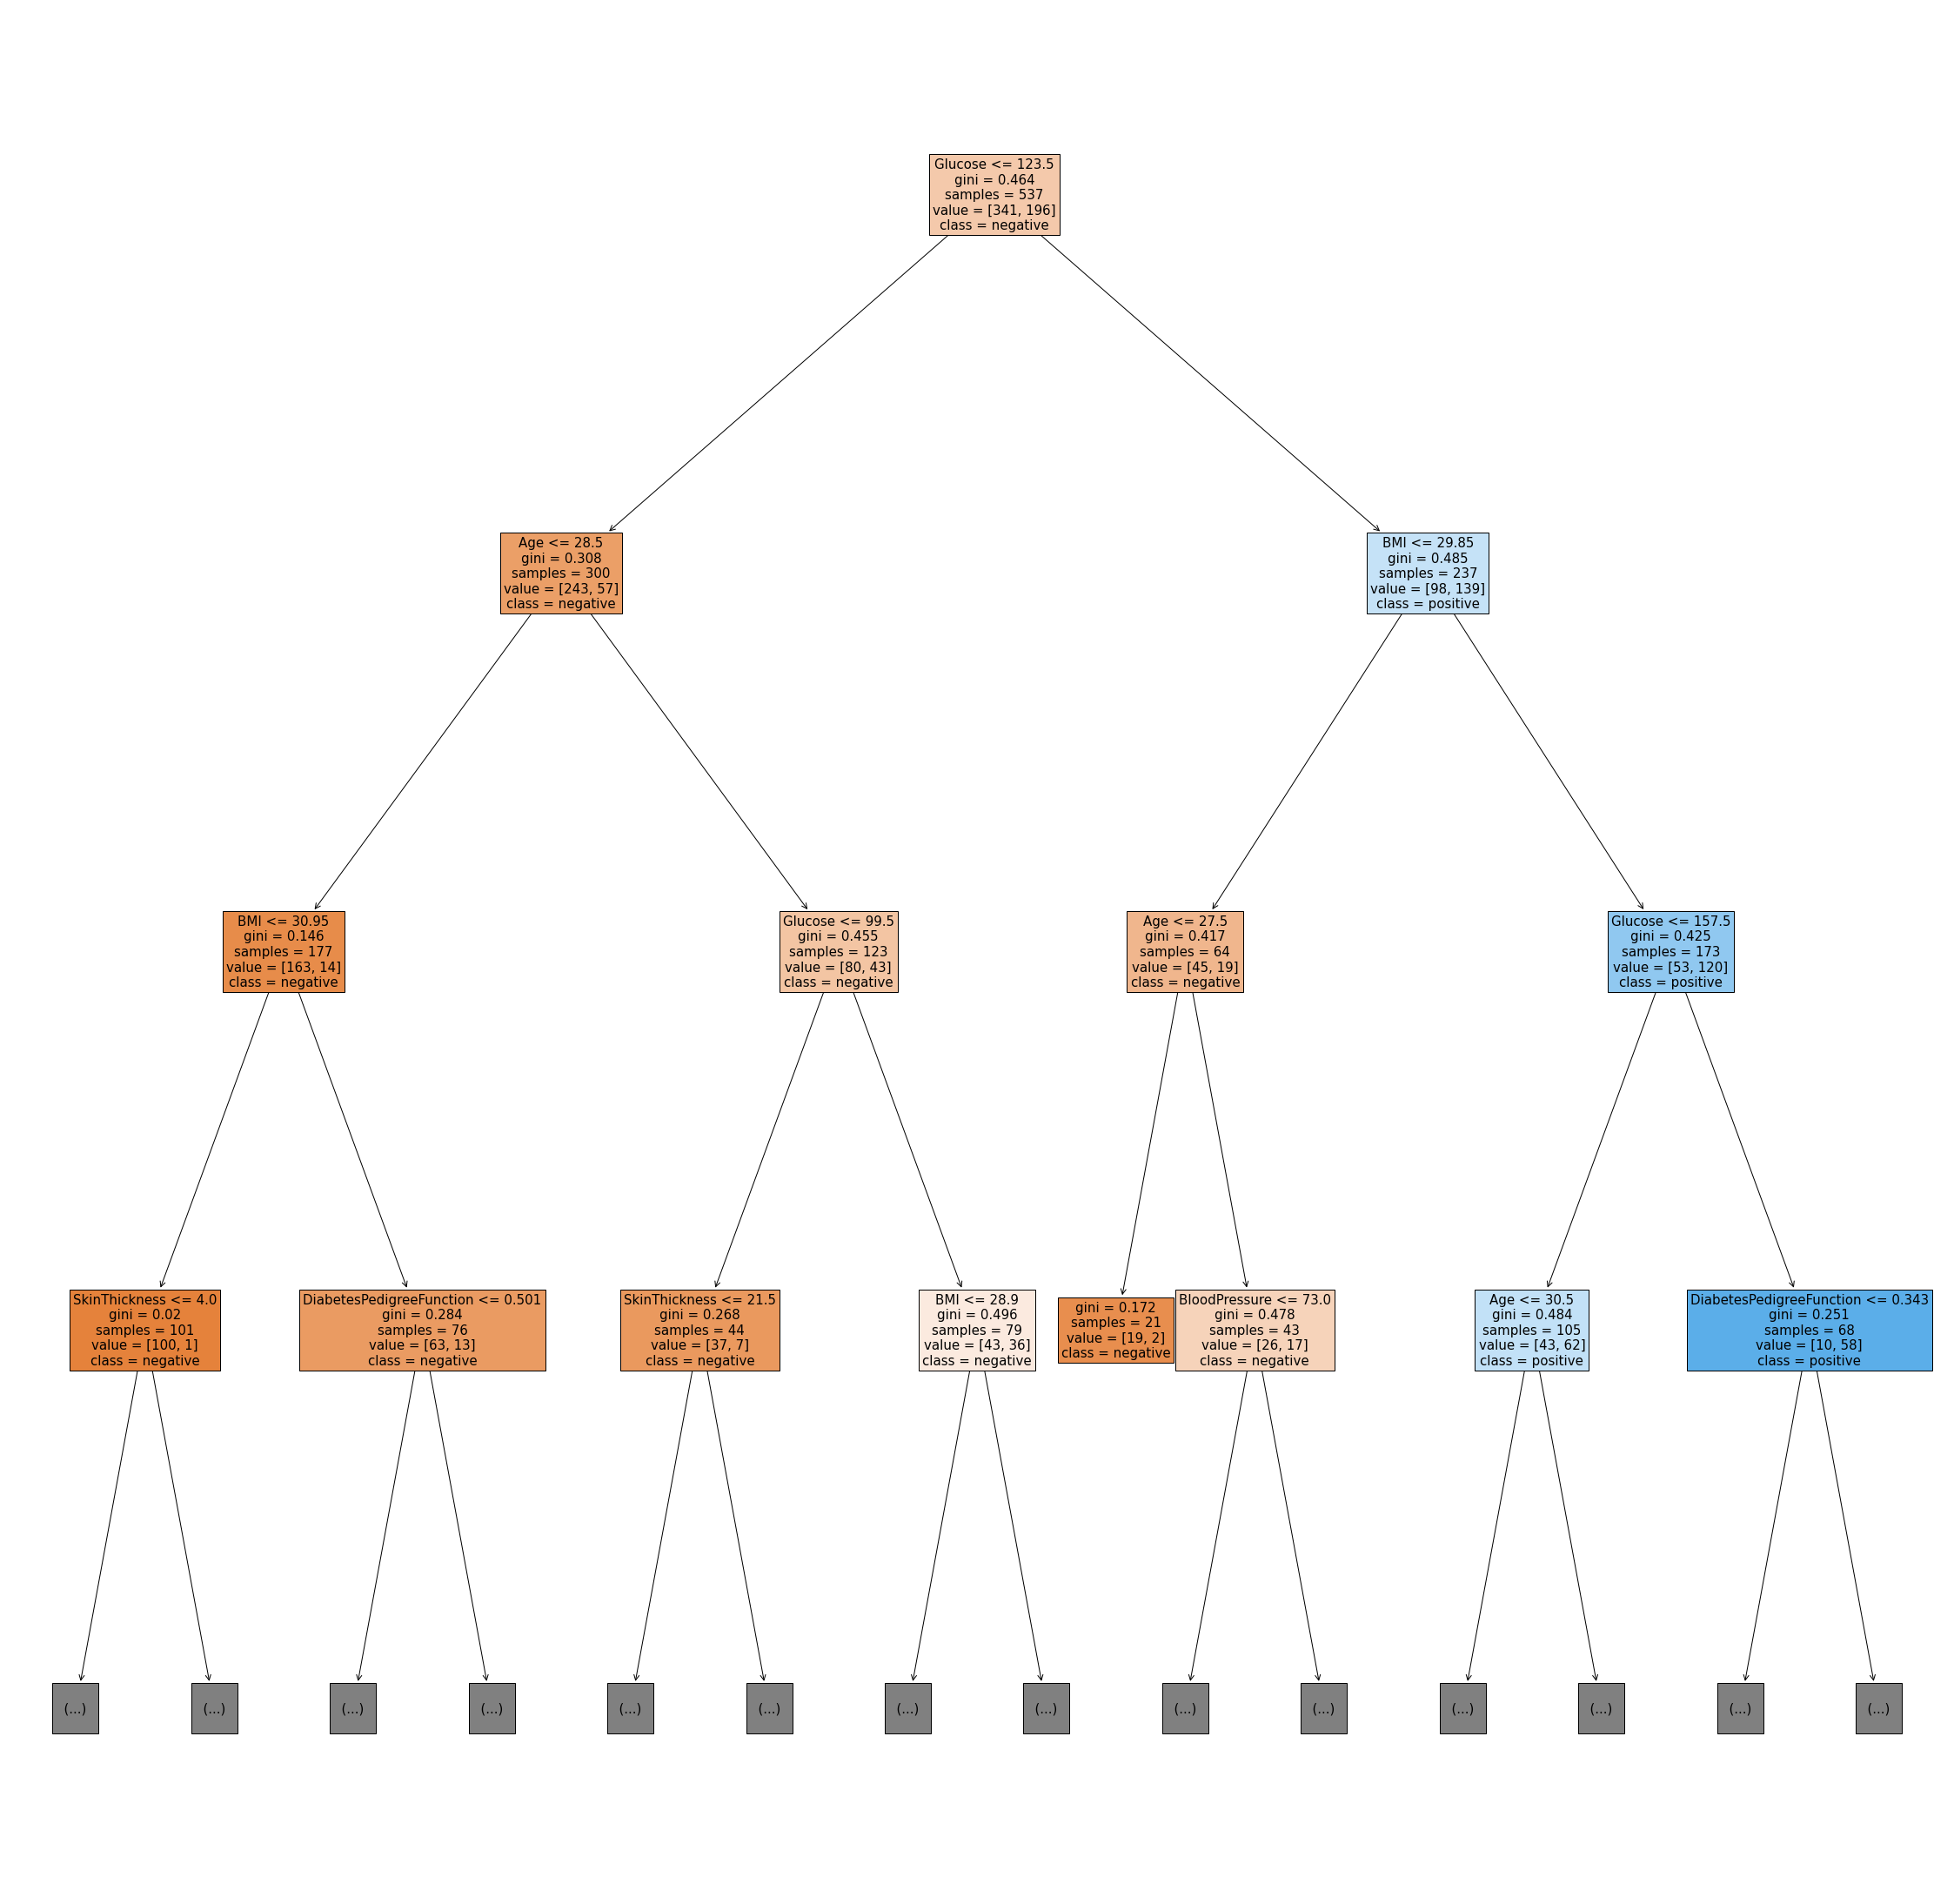

In [ ]:
####################
## Your code here ##
####################

from sklearn.tree import plot_tree


plt.figure( figsize = (40,40))
plot_tree(best_tree,
          feature_names = db.drop("Outcome", axis = 1).columns,
          class_names = target_names,
          filled = True,
          fontsize = 15,
          max_depth = 3)

#x_train은 pandas에서만 사용할 수 있다.

plt.show()

# professor's code

# from sklearn.tree import plot_tree

# plt.figure( figsize = (30,20))
# plot_tree(best_tree, feature_names = x_train.columns, 
#           class_names = ['negative', 'positive'], fontsize=15,
#           proportion=False, 
#           filled=True, rounded=True)
# plt.show()



Interpretation using proportions of classes should be included

Glucose <= 123.5 이고 Age <=2.85 이고 BMI <= 30.9 이면 class = negative, negative일 확률은 100/101 이다

Glucose <= 123.5 이고 Age <=2.85 이고 BMI > 30.9 이면 class = negative, negative일 확률은 63/76 이다.

Glucose <=123.5이고 Age >2.85 이고 Glucose <= 99.5 이면 class = negative, negative일 확률은 37/44 이다.

Glucose <=123.5이고 Age >2.85 이고 Glucose > 99.5 이면 class = negative, negative일 확률은 36/79 이다.

Glucose > 123.5 이고 BMI <= 29.85이고 Age<=27.5 이면  class = negative, negative일 확률은 19/21 

Glucose > 123.5이고 BMI <= 29.85이고 Age>27.5 이면  class = negative, negative일 확률은 26/43

Glucose > 123.5 이고 BMI > 29.85이고 Glucose <= 157.5 이면  class = positive, positive일 확률은 62/105이다  

Glucose > 123.5 이고 BMI > 29.85이고 Glucose > 157.5 이면  class = positive, positive일 확률은 58/68이다

<professor's answer>

If glucose is less than equal to 123.5, result will be negative with an 80% chance.
- If the subject is younger than 28.5, the probability of being negative increases to 92%.
- Otherwise, the probability of being negative is reduced to 65%.
If glucose is higher than 123.5, result will be positive with an 59% chance.
- If the BMI of subject is less than equal to 29.85, the probability of being positive is reduced to 30%.
- Otherwise, the probability of being positive increases to 70%.